**Implementations of Recurrent Neural Network (RNN) and Convolutional Neural Network (CNN)**

In [1]:
#Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical


Load and Prepare the data

In [2]:
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# One-hot encode the labels
y = to_categorical(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN and RNN
X_train_cnn = X_train.reshape(-1, 8, 8, 1)
X_test_cnn = X_test.reshape(-1, 8, 8, 1)

X_train_rnn = X_train.reshape(-1, 8, 8)
X_test_rnn = X_test.reshape(-1, 8, 8)


**CNN Model**

Epoch 1/10
45/45 [==============================] - 5s 14ms/step - loss: 1.7030 - accuracy: 0.4955 - val_loss: 0.9412 - val_accuracy: 0.8778
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 0.7603 - accuracy: 0.8003 - val_loss: 0.3614 - val_accuracy: 0.9278
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4397 - accuracy: 0.8942 - val_loss: 0.2196 - val_accuracy: 0.9500
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3272 - accuracy: 0.9095 - val_loss: 0.1682 - val_accuracy: 0.9528
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.9346 - val_loss: 0.1177 - val_accuracy: 0.9722
Epoch 6/10
45/45 [==============================] - 0s 6ms/step - loss: 0.2018 - accuracy: 0.9471 - val_loss: 0.0980 - val_accuracy: 0.9750
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0.1623 - accuracy: 0.9562 - val_loss: 0.0873 - val_accuracy: 0.9806
Epoch 8/10
45/45 [=

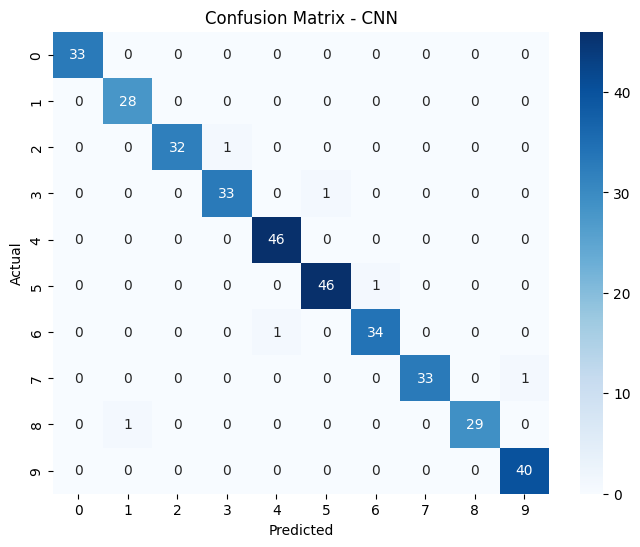

In [3]:
# Create CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=10, batch_size=32)

# Evaluate the model
cnn_y_pred = cnn_model.predict(X_test_cnn)
cnn_y_pred_classes = np.argmax(cnn_y_pred, axis=1)
cnn_y_true = np.argmax(y_test, axis=1)
print("CNN Model")
print(classification_report(cnn_y_true, cnn_y_pred_classes))
print(f'Accuracy: {accuracy_score(cnn_y_true, cnn_y_pred_classes):.2f}')

# Confusion Matrix for CNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(cnn_y_true, cnn_y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**RNN Model**

Epoch 1/10
45/45 [==============================] - 3s 17ms/step - loss: 1.9591 - accuracy: 0.4203 - val_loss: 1.4640 - val_accuracy: 0.4944
Epoch 2/10
45/45 [==============================] - 0s 8ms/step - loss: 1.0979 - accuracy: 0.6521 - val_loss: 0.7726 - val_accuracy: 0.7611
Epoch 3/10
45/45 [==============================] - 0s 8ms/step - loss: 0.6438 - accuracy: 0.8003 - val_loss: 0.4796 - val_accuracy: 0.8306
Epoch 4/10
45/45 [==============================] - 0s 8ms/step - loss: 0.4315 - accuracy: 0.8643 - val_loss: 0.3359 - val_accuracy: 0.8944
Epoch 5/10
45/45 [==============================] - 0s 9ms/step - loss: 0.3080 - accuracy: 0.8998 - val_loss: 0.2829 - val_accuracy: 0.9028
Epoch 6/10
45/45 [==============================] - 0s 9ms/step - loss: 0.2298 - accuracy: 0.9269 - val_loss: 0.2057 - val_accuracy: 0.9222
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.1873 - accuracy: 0.9422 - val_loss: 0.1767 - val_accuracy: 0.9306
Epoch 8/10
45/45 [=

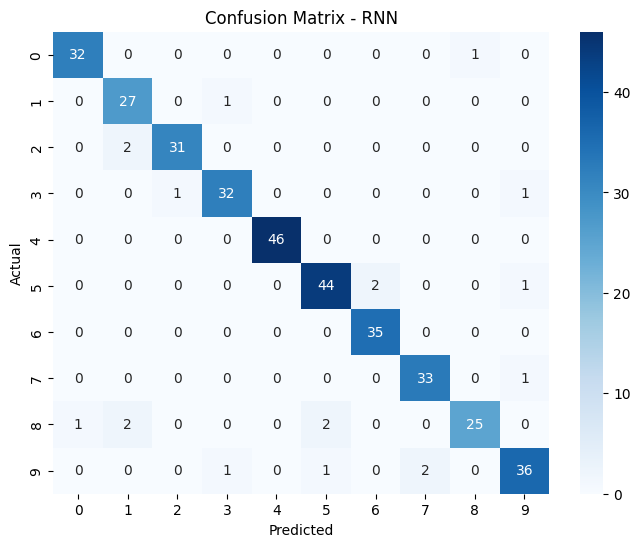

In [4]:
# Create RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(128, input_shape=(8, 8)))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(10, activation='softmax'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_rnn, y_train, validation_data=(X_test_rnn, y_test), epochs=10, batch_size=32)

# Evaluate the model
rnn_y_pred = rnn_model.predict(X_test_rnn)
rnn_y_pred_classes = np.argmax(rnn_y_pred, axis=1)
rnn_y_true = np.argmax(y_test, axis=1)
print("RNN Model")
print(classification_report(rnn_y_true, rnn_y_pred_classes))
print(f'Accuracy: {accuracy_score(rnn_y_true, rnn_y_pred_classes):.2f}')

# Confusion Matrix for RNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(rnn_y_true, rnn_y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Custom CNN Model**

**Import Required Libraries**

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

Load and Prepare the Data

In [10]:
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# One-hot encode the labels
y = to_categorical(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to be compatible with the CNN model
X_train = X_train.reshape(-1, 8, 8, 1)
X_test = X_test.reshape(-1, 8, 8, 1)


Custom CNN Model

In [11]:
# Create custom CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
45/45 [==============================] - 2s 10ms/step - loss: 1.9570 - accuracy: 0.3883 - val_loss: 1.2103 - val_accuracy: 0.8833
Epoch 2/10
45/45 [==============================] - 0s 5ms/step - loss: 0.8462 - accuracy: 0.7690 - val_loss: 0.3572 - val_accuracy: 0.9139
Epoch 3/10
45/45 [==============================] - 0s 6ms/step - loss: 0.4166 - accuracy: 0.8831 - val_loss: 0.1885 - val_accuracy: 0.9583
Epoch 4/10
45/45 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.9325 - val_loss: 0.1253 - val_accuracy: 0.9722
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.1722 - accuracy: 0.9422 - val_loss: 0.0984 - val_accuracy: 0.9694
Epoch 6/10
45/45 [==============================] - 0s 5ms/step - loss: 0.1422 - accuracy: 0.9569 - val_loss: 0.0790 - val_accuracy: 0.9722
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.0945 - accuracy: 0.9770 - val_loss: 0.0664 - val_accuracy: 0.9806
Epoch 8/10
45/45 [=

Evaluate the Model

12/12 [==============================] - 0s 2ms/step
Custom CNN Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      1.00      0.98        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       0.96      0.90      0.93        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy: 0.98


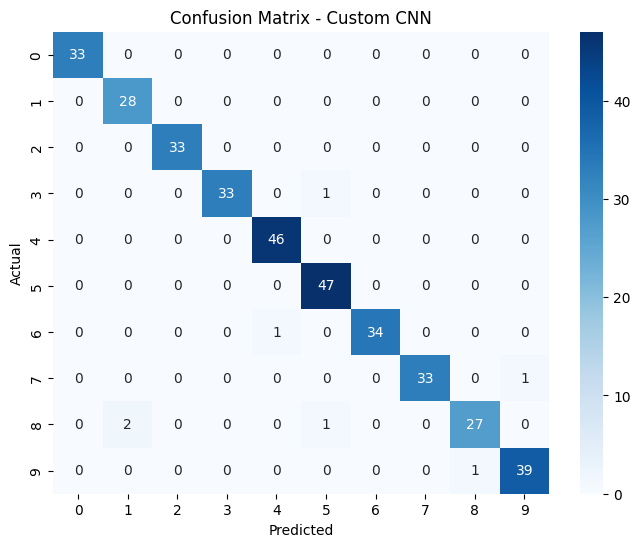

In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report and accuracy
print("Custom CNN Model")
print(classification_report(y_true, y_pred_classes))
print(f'Accuracy: {accuracy_score(y_true, y_pred_classes):.2f}')

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Custom CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# DNN - Deep Neural Network

Import Required Libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


Load and Prepare the Data

In [14]:
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# One-hot encode the labels
y = to_categorical(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Deep Learning Model

In [15]:
# Create the deep learning model
model = Sequential()

# Add input layer
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))

# Add hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)


Epoch 1/30
45/45 [==============================] - 2s 8ms/step - loss: 1.8999 - accuracy: 0.3563 - val_loss: 0.8484 - val_accuracy: 0.8750
Epoch 2/30
45/45 [==============================] - 0s 5ms/step - loss: 0.8990 - accuracy: 0.7105 - val_loss: 0.2483 - val_accuracy: 0.9333
Epoch 3/30
45/45 [==============================] - 0s 5ms/step - loss: 0.5083 - accuracy: 0.8323 - val_loss: 0.1453 - val_accuracy: 0.9528
Epoch 4/30
45/45 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.8984 - val_loss: 0.1056 - val_accuracy: 0.9667
Epoch 5/30
45/45 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.9186 - val_loss: 0.0920 - val_accuracy: 0.9694
Epoch 6/30
45/45 [==============================] - 0s 5ms/step - loss: 0.1857 - accuracy: 0.9402 - val_loss: 0.0946 - val_accuracy: 0.9750
Epoch 7/30
45/45 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.9443 - val_loss: 0.0814 - val_accuracy: 0.9778
Epoch 8/30
45/45 [==

Evaluate the Model

12/12 [==============================] - 0s 2ms/step
Deep Learning Model
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.96      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy: 0.98


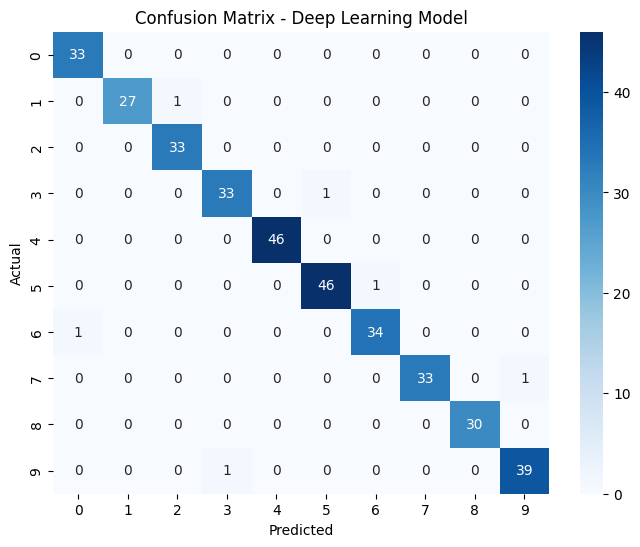

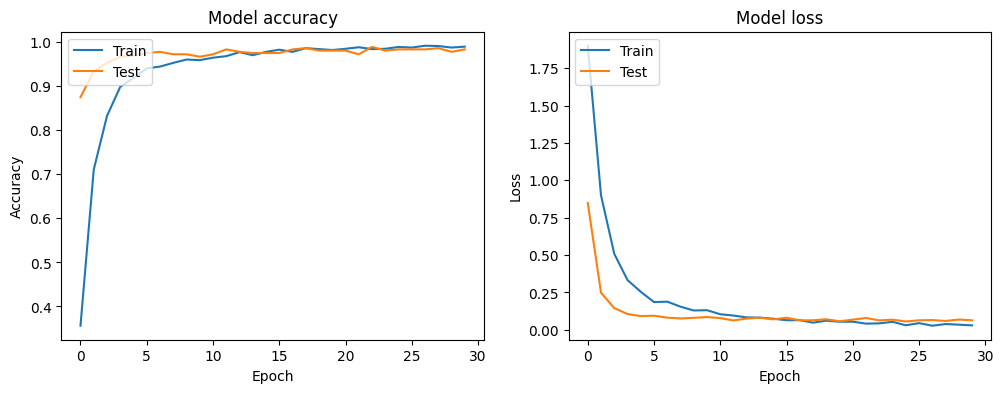

In [16]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report and accuracy
print("Deep Learning Model")
print(classification_report(y_true, y_pred_classes))
print(f'Accuracy: {accuracy_score(y_true, y_pred_classes):.2f}')

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Deep Learning Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
